In [ ]:
NAME = "Mohammed Ali Ali EL_Naggar"

---

# Deep Learning
# Assignment 1: Tensorflow and Basics

**Please follow the following instructions for your answers to be graded correctly**:
- Use tensorflow for all of the operations unless stated otherwise.
- Do not use any loops unless stated.
- Do not change any of the functions names.
- Inside the functions, make sure to write your code between the comments "# YOUR CODE STARTS HERE " and "# YOUR CODE ENDS HERE ". **Do not** edit any code outside these comments inside the functions.
- You're allowed to edit the cells that don't contain function definition.
- You will encounter some locked (read-only) empty cells. Leave those as they are, you're not allowed to edit them.
- Before you submit your assignment, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

## One-Hot encoding

Use tensorflow to obtain the one-hot encoding of a label, given the label and the total number of classes

In [ ]:
import tensorflow as tf

def one_hot_vector(label, n_classes):
    """
    Compute the one hot encoding for a given label

    Arguments:
        label --  (int)
        n_classes --  (int) Number of classes that the label can take

    Returns:
         one_hot -- tf.Tensor A single-column matrix with the one hot encoding.
    """
    # (approx. 1 line)
    # Use tensorflow's tf.one_hot
    # YOUR CODE STARTS HERE
    one_hot = tf.one_hot(label, n_classes)

    # YOUR CODE ENDS HERE
    return one_hot

In [ ]:
# make sure your function works as expected
one_hot_vector(2, 5)

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 0., 1., 0., 0.], dtype=float32)>

## Sigmoid and Tanh with Gradients

### Sigmoid function

Build a function that returns the sigmoid of a tensor x. Use tf.exp(x) for the exponential function.

**Reminder**:
$sigmoid(x) = \frac{1}{1+e^{-x}}$ is sometimes also known as the logistic function. It is a non-linear function used not only in Machine Learning (Logistic Regression), but also in Deep Learning.


In [ ]:
import numpy as np
def sigmoid(x):
    """
    Compute sigmoid of x.

    Arguments:
    x -- A tf.Tensor. Must be one of the following types: bfloat16, half, float32, float64, complex64, complex128.

    Return:
    s -- sigmoid(x)
    """
    # (≈ 1 line of code)
    # YOUR CODE STARTS HERE
    s= 1/(1+tf.exp(-x))

    # YOUR CODE ENDS HERE

    return s

In [ ]:
# make sure your sigmoid function works as expected by comparing it to tensorflow's sigmoid
x = tf.constant([1.0,2.0,3.0])
assert np.allclose(sigmoid(x), tf.nn.sigmoid(x))

### Tanh function

Another common activation function in Deep learning is Tanh function.\
Build a function that returns the tanh of a tensor x. Use tf.exp(x) for the exponential function.

**Reminder**:
$tanh(x) = \frac{e^x-e^{-x}}{e^x+e^{-x}}$

In [ ]:
def tanh(x):
    """
    Compute tanh of x.

    Arguments:
    x -- A tf.Tensor. Must be one of the following types: bfloat16, half, float32, float64, complex64, complex128.

    Return:
    t -- tanh(x)
    """
    # (≈ 1 lines of code)
    # YOUR CODE STARTS HERE
    t = (tf.exp(x)-tf.exp(-x))/(tf.exp(x)+tf.exp(-x))
    # YOUR CODE ENDS HERE

    return t

In [ ]:
# make sure your tanh function works as expected by comparing it to tensorflow's tanh
x = tf.constant([1.0,2.0,3.0])
assert np.allclose(tanh(x), tf.nn.tanh(x))

### Gradient function

Write your solution in the specified space inside the following function to satisfy the specified requirements.

In [ ]:
import matplotlib.pyplot as plt

def gradient_func(function, x, plot=False):
    '''
    Compute gradient of function with respect to x and plot a figure with x on the x-axis and both the function
    and its gradient on the y-axis, if plot is True.

    Arguments:
    function -- a function that can take x as an argument
    x -- A tf.Tensor.
    plot -- a Boolean. If True, a figure is plotted with x on the x-axis and both the function and its gradient on the y-axis

    Return:
    grad -- function gradient with respect to x
    '''
    # Start by using tensorflow's GradientTape and Use GradientTape.watch to record gradients with respect to x
    # YOUR CODE STARTS HERE
    # use GradientTape to record opertaion on x
    with tf.GradientTape() as tape:
      # watch x as input varible
      tape.watch(x)
      # get output of function
      y = function(x)

      # compute gradient of y respect to x
      grad = tape.gradient(y,x)

      # plotting
      if plot:
        # convert tensor into numpy for plotting
        x_np , y_np , grad_np = x.numpy(),y.numpy(), grad.numpy()

        plt.figure(figsize=(6,5))
        plt.plot(x_np,y_np, label= "function",color = "blue")
        plt.plot(x_np,grad_np,label = "gradient",color = "red")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.legend()
        plt.title("functions with graident")
        plt.show()

    # YOUR CODE ENDS HERE
    return grad

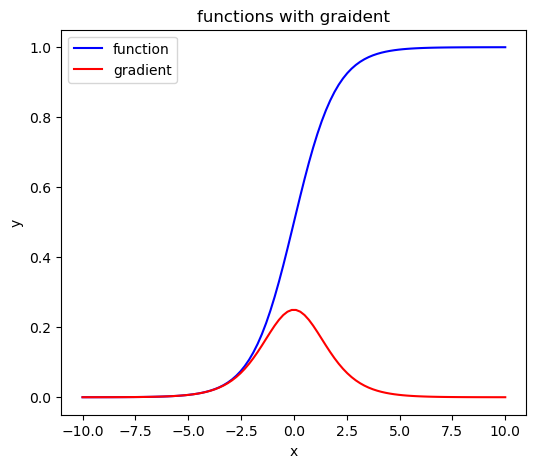

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([4.53958077e-05, 5.55575620e-05, 6.79936937e-05, 8.32130942e-05,
       1.01838442e-04, 1.24631609e-04, 1.52524715e-04, 1.86658091e-04,
       2.28426653e-04, 2.79536554e-04, 3.42074339e-04, 4.18591319e-04,
       5.12206458e-04, 6.26731702e-04, 7.66824507e-04, 9.38173215e-04,
       1.14772200e-03, 1.40394326e-03, 1.71716676e-03, 2.09997591e-03,
       2.56768332e-03, 3.13889855e-03, 3.83620191e-03, 4.68693782e-03,
       5.72413978e-03, 6.98759437e-03, 8.52504404e-03, 1.03935138e-02,
       1.26607241e-02, 1.54065171e-02, 1.87241696e-02, 2.27213903e-02,
       2.75206964e-02, 3.32587242e-02, 4.00838615e-02, 4.81513998e-02,
       5.76152215e-02, 6.86149280e-02, 8.12573764e-02, 9.55919842e-02,
       1.11580066e-01, 1.29060077e-01, 1.47712989e-01, 1.67034879e-01,
       1.86326443e-01, 2.04710159e-01, 2.21183725e-01, 2.34711795e-01,
       2.44347497e-01, 2.49363393e-01, 2.49363393e-01, 2.44347497e-01,
       2.34711795e-01, 2.2118

In [ ]:
# Call your "gradient_func" function to see the gradient and plot the function & gradient of your sigmoid function
x = tf.linspace(-10, 10, 100)
gradient_func(sigmoid, x, plot=True)

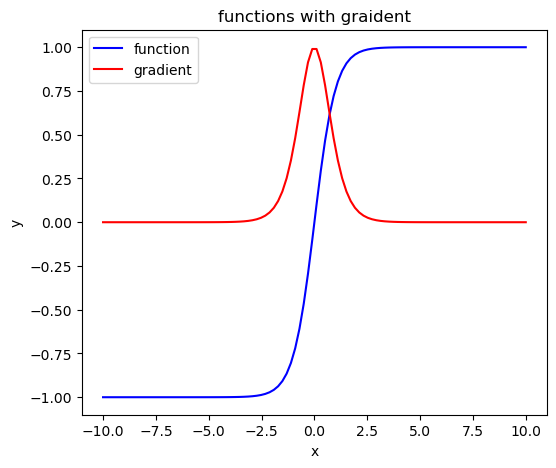

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([8.24461444e-09, 1.23493148e-08, 1.84975998e-08, 2.77068977e-08,
       4.15011774e-08, 6.21631380e-08, 9.31119540e-08, 1.39469084e-07,
       2.08905778e-07, 3.12912525e-07, 4.68700515e-07, 7.02049765e-07,
       1.05157521e-06, 1.57511673e-06, 2.35931045e-06, 3.53392522e-06,
       5.29333635e-06, 7.92868998e-06, 1.18760795e-05, 1.77887049e-05,
       2.66449510e-05, 3.99102606e-05, 5.97795672e-05, 8.95403570e-05,
       1.34116330e-04, 2.00881377e-04, 3.00878030e-04, 4.50640755e-04,
       6.74923051e-04, 1.01077340e-03, 1.51362059e-03, 2.26634416e-03,
       3.39276094e-03, 5.07760312e-03, 7.59594491e-03, 1.13561717e-02,
       1.69618853e-02, 2.52992122e-02, 3.76557457e-02, 5.58731868e-02,
       8.25220882e-02, 1.21053315e-01, 1.75810216e-01, 2.51661539e-01,
       3.52852474e-01, 4.80597804e-01, 6.29317917e-01, 7.82769589e-01,
       9.13515012e-01, 9.89865962e-01, 9.89865962e-01, 9.13515012e-01,
       7.82769589e-01, 6.2931

In [ ]:
# Call your "gradient_func" function to see the gradient and plot the function & gradient of your sigmoid function
x = tf.linspace(-10, 10, 100)
gradient_func(tanh, x, True)

## Softmax function

Implement a softmax function using tensorflow. You can think of softmax as a normalizing function (makes the sum of features of a sample to equal 1. Used when your algorithm needs to classify two or more classes.

**Instructions**:
- $ \text{for } x \in \mathbb{R}^{1\times n} \text{,     } softmax(x) = softmax(\begin{bmatrix}
    x_1  &&
    x_2 &&
    ...  &&
    x_n  
\end{bmatrix}) = \begin{bmatrix}
     \frac{e^{x_1}}{\sum_{j}e^{x_j}}  &&
    \frac{e^{x_2}}{\sum_{j}e^{x_j}}  &&
    ...  &&
    \frac{e^{x_n}}{\sum_{j}e^{x_j}}
\end{bmatrix} $

- $\text{for a matrix } x \in \mathbb{R}^{m \times n} \text{,  $x_{ij}$ maps to the element in the $i^{th}$ row and $j^{th}$ column of $x$, thus we have: }$  $$softmax(x) = softmax\begin{bmatrix}
    x_{11} & x_{12} & x_{13} & \dots  & x_{1n} \\
    x_{21} & x_{22} & x_{23} & \dots  & x_{2n} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    x_{m1} & x_{m2} & x_{m3} & \dots  & x_{mn}
\end{bmatrix} = \begin{bmatrix}
    \frac{e^{x_{11}}}{\sum_{j}e^{x_{1j}}} & \frac{e^{x_{12}}}{\sum_{j}e^{x_{1j}}} & \frac{e^{x_{13}}}{\sum_{j}e^{x_{1j}}} & \dots  & \frac{e^{x_{1n}}}{\sum_{j}e^{x_{1j}}} \\
    \frac{e^{x_{21}}}{\sum_{j}e^{x_{2j}}} & \frac{e^{x_{22}}}{\sum_{j}e^{x_{2j}}} & \frac{e^{x_{23}}}{\sum_{j}e^{x_{2j}}} & \dots  & \frac{e^{x_{2n}}}{\sum_{j}e^{x_{2j}}} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    \frac{e^{x_{m1}}}{\sum_{j}e^{x_{mj}}} & \frac{e^{x_{m2}}}{\sum_{j}e^{x_{mj}}} & \frac{e^{x_{m3}}}{\sum_{j}e^{x_{mj}}} & \dots  & \frac{e^{x_{mn}}}{\sum_{j}e^{x_{mj}}}
\end{bmatrix} = \begin{pmatrix}
    softmax\text{(first row of x)}  \\
    softmax\text{(second row of x)} \\
    ...  \\
    softmax\text{(last row of x)} \\
\end{pmatrix} $$

**Note**\
Note that "m" is used to represent the "number of training examples".
Softmax should be performed for all features of each training example, so softmax would be performed on the rows.

$m$ is the number of rows and $n$ is the number of columns.

In [ ]:
def softmax(x):
    """Calculates the softmax for each row of the input x.

    Your code should work for a row vector and also for matrices of shape (m,n).

    Argument:
    x -- A tensor or numpy matrix of shape (m,n)

    Returns:
    s -- A tensor matrix equal to the softmax of x, of shape (m,n)
    """
    # (≈ 3 lines of code)
    # Apply exp() element-wise to x to get x_exp.
    # Create a vector x_sum that sums each row of x_exp.
    # Compute softmax(x) by dividing results of 2 previous steps.
    # YOUR CODE STARTS HERE
    x_exp = tf.exp(x)
    x_sum = tf.reduce_sum(x_exp, axis=1, keepdims=True)
    s = x_exp / x_sum
    # YOUR CODE ENDS HERE
    return s

In [ ]:
x = np.array([
    [9, 2, 5, 0, 0],
    [7, 5, 0, 0 ,0]], dtype=float)
print("softmax(x) = " + str(softmax(x)))
print("sum of each row of softmax(x) = " + str(tf.reduce_sum(softmax(x), axis=1)))

softmax(x) = tf.Tensor(
[[9.80897665e-01 8.94462891e-04 1.79657674e-02 1.21052389e-04
  1.21052389e-04]
 [8.78679856e-01 1.18916387e-01 8.01252314e-04 8.01252314e-04
  8.01252314e-04]], shape=(2, 5), dtype=float64)
sum of each row of softmax(x) = tf.Tensor([1. 1.], shape=(2,), dtype=float64)


## Computations on Tensors

A convenient way to think about and visualize computations in TensorFlow is in terms of graphs. We can define this graph in terms of Tensors, which hold data, and the mathematical operations that act on these Tensors in some order.\
\
Define a simple function in TensorFlow to construct the computations represented by the following graph:

![fig1.png](attachment:b64a01f8-7e5f-4dd1-9173-365d23cc2631.png)


In [ ]:
def graph_operations():
    '''
    Define the operations for a, b, c, d and e (use tf.add, tf.subtract, tf.multiply).
    Start by initializing the tf constants a and b as showed by the graph.
    Your solution should look like this:
    a = ........
    b = ........
    c = ........
    d = ........
    e = ........
    '''
    # (≈ 5 lines of code)
    # YOUR CODE STARTS HERE
    a = tf.constant(5)
    b = tf.constant(7)
    c = tf.add(a,b)
    d = tf.subtract(a,b)
    e =tf.multiply(a,b)

    # YOUR CODE ENDS HERE
    return a, b, c, d, e

In [ ]:
# Run this to make sure your function works as expected
graph_operations()

(<tf.Tensor: shape=(), dtype=int32, numpy=5>,
 <tf.Tensor: shape=(), dtype=int32, numpy=7>,
 <tf.Tensor: shape=(), dtype=int32, numpy=12>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-2>,
 <tf.Tensor: shape=(), dtype=int32, numpy=35>)

Notice that these tensors have no shape as each of them is a single scalar value.

## Broadcasting

Broadcasting is the process of making arrays to have compatible shapes for arithmetic operations. Two shapes are compatible if for each dimension pair they are either equal or one of them is one.\
When broadcasting, if a tensor has fewer axes than necessary its shape is padded on the left with ones.\
\
**Examples:**
- shapes (1,3) and (2, 3) are broadcastable, because for the first dimension, one of them has 1, and for the second dimension they're both equal.
- shapes (3,) and (2,3) are broadcastable, because the first tensor of shape (3,) will be broadcasted to (2,3)
- shapes (2, 3) and (3,3) are not broadcastable

In [ ]:
def are_broadcastable(tensor1, tensor2):
    '''
    This function checks whether two tensors are broadcastable for element-wise operations by comparing their
    dimensions, starting from the last dimension. It returns True if they're broadcastable and returns
    False otherwise.
    '''
    for dim1, dim2 in zip(tensor1.shape[::-1], tensor2.shape[::-1]):
        if dim1 != dim2 and dim1 != 1 and dim2 != 1:
            return False
    return True

In [ ]:
def elementwise_operation(tensor1, tensor2, operation):
    '''
    Compute a specified element-wise operation on two tensors. The operation can be: addition,
    subtraction, division or multiplication.
    Use tf.add, tf.subtract, tf.divide, tf.multiply

    Before performing the operation, your function should check if both tensors are broadcastable and
    raise a "ValueError("tensor shapes are not compatible")" in case of non-broadcastable tensors.

    If a different/incorrect operation is given, raise a "ValueError("Operation not supported")"

    Arguments:
    tensor1 -- a tensor
    tensor2 -- a tensor
    operation -- "add", "subtract", "divide", "multiply"

    Returns:
    output -- the output of the operation
    '''
    output = None
    # YOUR CODE STARTS HERE
    if not are_broadcastable(tensor1, tensor2) :
     raise  ValueError("tensor shapes are not compatible")

    if operation not in ["add", "subtract", "divide", "multiply"] :
      raise ValueError("Operation not supported")

    if operation == "add"  :
      output = tf.add(tensor1,tensor2)
    elif operation == "subtract" :
      output = tf.subtract(tensor1,tensor2)
    elif operation == "divide":
      output = tf.divide(tensor1,tensor2)
    elif operation == "multiply":
      output = tf.multiply(tensor1,tensor2)






    # YOUR CODE ENDS HERE
    return output

In [ ]:
# Use this cell to test your function
tensor1 = tf.constant([[1, 2], [3, 4]])
tensor2 = tf.constant([[5, 6], [7, 8]])

elementwise_operation(tensor1, tensor2, "add")

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 6,  8],
       [10, 12]])>

## Gradient Descent

Implement the Mean Squared Error Loss function. Use vectorization, **Do Not** use any loops.\
\
**Reminder:**
$$MSE = \frac{1}{n}\sum_{i=1}^{n}({Y_i} - {\hat{Y_i}})^2 \\ n: \text{number of data points} \\ Y_i: \text{true values} \\ \hat{Y_i}: \text{predicted values}$$

In [ ]:
def mse_loss(pred, y):
    """
    Calculates the mean squared error.

    Arguments:
    pred -- predicted labels. A tensor or array of shape (n_samples,)
    y -- true labels. A tensor or array of shape (n_samples,)

    Returns:
    mse -- mean squared error
    """
    # YOUR CODE STARTS HERE
    squared_diff = (tf.square(tf.subtract(y,pred)))
    mse = tf.reduce_mean(squared_diff)
    # YOUR CODE ENDS HERE
    return mse

In [ ]:
pred = tf.constant([.9, 0.2, 0.1, .4, .9])
y = tf.constant([1., 0., 0., 1., 1.])
mse_loss(pred, y)

<tf.Tensor: shape=(), dtype=float32, numpy=0.086>

Implement gradient descent algorithm to update a single weight of a single neuron. The goal is to fit a line: y_pred = x * w through some data.\
1- We start with a random weight (given as an argument to our function)\
2- Calculate predicted value, where y_pred = x * w\
3- Calculate the loss (here, MSE) between predicted and true values of Y\
4- Calculate gradient of the loss with respect to the weight\
5- Update the weight using the gradient and learning rate:  weight - learning_rate * gradient\
6- repeat 2:5 for a given number of iterations

In [ ]:
def gradient_descent(weight, x, y, loss_fn, learning_rate, num_iters):
    """
    Gradient Descent for a single neuron weight update.

    Arguments:
    weight     : initial random weight
    x          : Input data (tf.Tensor of shape (n_samples,))
    y          : True labels (tf.Tensor of shape (n_samples,))
    loss_fn    : Loss function ('mse' for mean squared error, 'bce' for binary cross-entropy)
    learning_rate         : Learning rate (float)
    num_iters  : Number of iterations (int)

    Returns:
    weights_history    : List of weights at each iteration (list)
    final_pred : Final predictions after training (tf.Tensor)
    """

    weights_history = []
    loss_history = []
    weight = tf.Variable(weight, dtype=tf.float32)

    # GD loop
    for i in range(num_iters):
        # (approx. 5 lines of code)
        # Use GradientTape to allow tf to trace the gradients
        # compute the loss using the loss_fn provided: loss = ...........
        # Compute the gradient of the loss with respect to the weight: grad = ........
        # update the weight: weight = .............

        # YOUR CODE STARTS HERE
        with tf.GradientTape() as tape:
            #Calc predicted value
            y_pred = x * weight
            # Calc the loss
            loss = mse_loss(y_pred, y)
            grad = tape.gradient(loss, weight)

        # Update weight
            weight.assign_sub(learning_rate*grad)

        # YOUR CODE ENDS HERE

        weights_history.append(weight.numpy()[0])
        loss_history.append(loss.numpy())

    final_pred = x * weight

    return weights_history, loss_history, final_pred.numpy()


Run the following cell to test your gradient_descent function using random data. Notice the final fitted line vs the line fitted using the initial weight before training. Also notice the decay of the loss with iterations.

Text(0, 0.5, 'Loss')

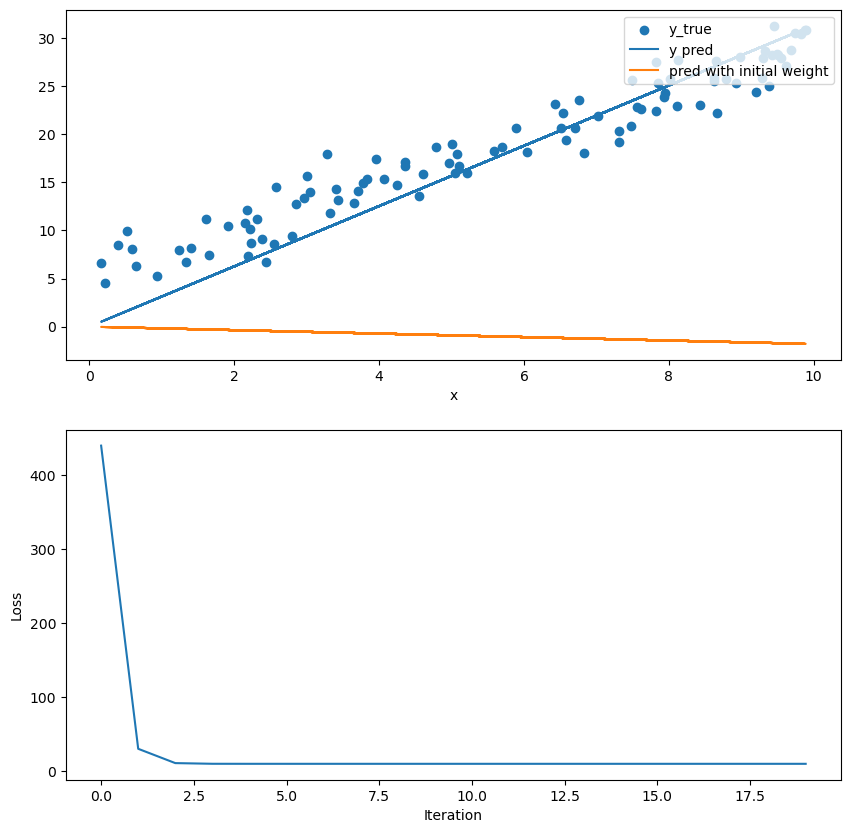

In [ ]:
# Generating some random data
n_samples = 100
x = np.random.rand(n_samples) * 10  # Random values for X between 0 and 10
true_weight = 2.5  # True weight (slope)
true_bias = 5.0    # True bias (intercept)
noise = np.random.randn(n_samples) * 2  # Gaussian noise
y = true_weight * x + true_bias + noise

# Calling the gradient_descent function
tf.random.set_seed(5)
initial_weight = tf.Variable(tf.random.normal([1]), dtype=tf.float32)  # a random initial weight
learning_rate = 0.01
num_iters = 20
weights_history, loss_history, final_pred = gradient_descent(initial_weight, x, y, mse_loss, learning_rate=learning_rate, num_iters=num_iters)

fig, axs = plt.subplots(2,1, figsize = (10,10))
axs[0].scatter(x, y, label="y_true")
axs[0].plot(x, final_pred, label="y pred")
axs[0].plot(x, initial_weight*x, label="pred with initial weight")
axs[0].legend(loc = "upper right")
axs[0].set_xlabel('x')
axs[1].plot(range(num_iters), loss_history)
axs[1].set_xlabel('Iteration')
axs[1].set_ylabel('Loss')
